# Восстановление золота из руды

Проект предоставлен компанией «Цифра».

**Постановка задачи**  
Подготовим прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.  
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В нашем распоряжении данные с параметрами добычи и очистки.  
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.  

**Данные**  
Данные находятся в трёх файлах:  
`gold_recovery_train_new.csv` — обучающая выборка;  
`gold_recovery_test_new.csv` — тестовая выборка;  
`gold_recovery_full_new.csv` — исходные данные.  

Данные индексируются датой и временем получения информации (признак date).   Соседние по времени параметры часто похожи.  
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.  
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.
В нашем распоряжении сырые данные: их просто выгрузили из хранилища.   

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

## Подготовка данных

### Изучение файлов

In [ ]:
df_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv', index_col = 'date')

In [ ]:
df_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant                      14117 non-null float64
primary_cleaner.i

In [ ]:
df_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv', index_col = 'date')

In [ ]:
df_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.input.feed_ag                         529

In [ ]:
df_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv', index_col = 'date')

In [ ]:
df_full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant                      19402 non-null float64
primary_cleaner.i

**Описание данных**  

*Технологический процесс*
- `Rougher feed` — исходное сырье
- `Rougher additions` (или reagent additions) — флотационные реагенты: Xanthate, - `Sulphate, Depressant
- `Xanthate` **— ксантогенат (промотер, или активатор флотации);
- `Sulphate` — сульфат (на данном производстве сульфид натрия);
- `Depressant` — депрессант (силикат натрия).
- `Rougher process` (англ. «грубый процесс») — флотация
- `Rougher tails` — отвальные хвосты
- `Float banks` — флотационная установка
- `Cleaner process` — очистка
- `Rougher Au` — черновой концентрат золота
- `Final Au` — финальный концентрат золота 

*Параметры этапов*
- `air amount` — объём воздуха
- `fluid levels` — уровень жидкости
- `feed size` — размер гранул сырья
- `feed rate` — скорость подачи  

*Наименование признаков*  

Наименование признаков должно быть такое:  
`[этап].[тип_параметра].[название_параметра]`  
Пример: rougher.input.feed_ag  

*Возможные значения для блока [этап]:*
- `rougher` — флотация
- `primary_cleaner` — первичная очистка
- `secondary_cleaner` — вторичная очистка
- `final` — финальные характеристики  

*Возможные значения для блока [тип_параметра]:*
- `input` — параметры сырья
- `output` — параметры продукта
- `state` — параметры, характеризующие текущее состояние этапа
- `calculation` — расчётные характеристики

Сравним, действительно ли обущающая и тестовая выборки взяти из сходной:

In [ ]:
len(df_train) + len(df_test) - len(df_full)

0

### Проверка рассчета эффективности обогащения  

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery и найдем MAE между  расчётами и значением признака.

Эффективность обогащения рассчитывается по формуле: 

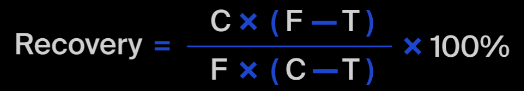,

где:   
- `C` — доля золота в концентрате после флотации/очистки, колонка: `rougher.output.concentrate_au`;
- `F` — доля золота в сырье/концентрате до флотации/очистки, колонка: `rougher.input.feed_au`;
- `T` — доля золота в отвальных хвостах после флотации/очистки, колонка: `rougher.output.tail_au`.

In [ ]:
C = df_train.loc[~df_train['rougher.output.recovery'].isna(), 'rougher.output.concentrate_au']
F = df_train.loc[~df_train['rougher.output.recovery'].isna(), 'rougher.input.feed_au']
T = df_train.loc[~df_train['rougher.output.recovery'].isna(), 'rougher.output.tail_au']

Создадим столбце `rougher.output.calculated`, в который положим значения эффетивности обогащения:

In [ ]:
df_train['rougher.output.calculated'] = C * (F - T) / (F * (C - T)) * 100
df_train['rougher.output.calculated'].head()

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
Name: rougher.output.calculated, dtype: float64

Выведем на экран значения на обучающей выборке:

In [ ]:
rough_recov_train = df_train.loc[~df_train['rougher.output.recovery'].isna(), 'rougher.output.recovery']
rough_recov_train.head()

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
Name: rougher.output.recovery, dtype: float64

Рассчитаем MAE:

In [ ]:
mean_absolute_error(df_train['rougher.output.recovery'], df_train['rougher.output.calculated'])

9.682896147825551e-15

Вывод

Метрика MAE достаточно мала, следовательно, показатель эффективности рассчитан верно

### Анализ признаков, недоступных в тестовой выборке

Проведем аналищ признаков, недоступных в тестовой выборке:

In [ ]:
out_test_list = sorted(list(set(list(df_full.columns)) - set(list(df_test.columns))))

Выведем количество отсутсвующих признаков:

In [ ]:
len(out_test_list)

34

Выведем отсутсвующие признаки:

In [ ]:
out_test_list

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Вывод
- В тестовой выборке отсутствуют выходные параметры продукта `output` на каждом этапе техпроцесса. Это концентраты и "отвальные хвосты" для металлов и солей, а также рассчитанное `recovery` на разных этапах. Эти данные в любом случае не подходят для тренировки модели, так как появляются во время или после измерения целевых признаков.
- Также в тестовой выборке отсутствуют расчётные признаки на этапе флотации `rougher.calculation` (концентрация сульфатов относительно золота, соотношение золота и свинца, и др.).

### Предобработка данных

Посмотрим размер тестовой выборки:

In [ ]:
df_test.shape

(5290, 52)

Выведем размер обучающей выборки:

In [ ]:
df_train = df_train[df_test.columns]
df_train.shape

(14149, 52)

Выведем долю пропущенных значений в признаках тестовой выборки:

In [ ]:
df_test.isna().mean().sort_values(ascending=False).head(15)

rougher.input.floatbank11_xanthate          0.004726
rougher.input.feed_sol                      0.003970
secondary_cleaner.state.floatbank3_a_air    0.001701
rougher.input.floatbank11_sulfate           0.001512
primary_cleaner.input.depressant            0.000945
rougher.input.floatbank10_sulfate           0.000945
primary_cleaner.input.sulfate               0.000756
primary_cleaner.input.xanthate              0.000756
secondary_cleaner.state.floatbank2_a_air    0.000567
rougher.input.feed_rate                     0.000567
secondary_cleaner.state.floatbank2_b_air    0.000378
rougher.input.feed_size                     0.000189
primary_cleaner.input.feed_size             0.000000
rougher.input.floatbank10_xanthate          0.000000
primary_cleaner.state.floatbank8_a_air      0.000000
dtype: float64

Выведем долю пропущенных значений в признаках обущающей выборки:

In [ ]:
df_train.isna().mean().sort_values(ascending=False).head(15)

rougher.state.floatbank10_e_air             0.030815
rougher.input.floatbank11_xanthate          0.030249
secondary_cleaner.state.floatbank2_a_air    0.015337
rougher.input.feed_size                     0.010177
primary_cleaner.input.xanthate              0.007068
rougher.input.feed_pb                       0.007068
rougher.input.feed_sol                      0.005513
rougher.input.floatbank11_sulfate           0.002544
primary_cleaner.input.depressant            0.002262
rougher.input.floatbank10_sulfate           0.002050
secondary_cleaner.state.floatbank2_b_air    0.001484
primary_cleaner.input.sulfate               0.001414
rougher.input.floatbank10_xanthate          0.000565
rougher.input.feed_rate                     0.000565
secondary_cleaner.state.floatbank4_a_air    0.000424
dtype: float64

Исходя из условий сборка данных, а именно: "Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи", воспользуется методом заполнения пропущенных значений "ffill":

In [ ]:
df_train.fillna(method='ffill', inplace=True)

In [ ]:
df_test.fillna(method='ffill', inplace=True)

Предобработка выполнена

## Анализ данных

### Концентрация металлов
Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки


Определим функцию для постраения распределений и диаграмммы размаха:

In [ ]:
def metall_concentration(metall, pltx, plty):
  plt.figure(figsize=(20, 5))
  sns.histplot(data=df_full, x=f"rougher.input.feed_{metall}", kde=True, bins=30, color='grey')
  sns.histplot(data=df_full, x=f"rougher.output.concentrate_{metall}", kde=True, bins=30, color='red')
  sns.histplot(data=df_full, x=f"primary_cleaner.output.concentrate_{metall}", kde=True, bins=30, color='yellow')
  sns.histplot(data=df_full, x=f"final.output.concentrate_{metall}", kde=True, bins=30, color='green')
  plt.title(f'Распределение концентрации {metall} на различных этапах очистки')
  plt.ylabel('Количество')
  plt.xlabel('Концентрация')
  plt.grid(color='grey', axis='both', alpha=0.5)
  plt.xticks(pltx)
  plt.yticks(plty)
  plt.legend(['Начальный этап', 'Этап флотации', 'Первичная очистка', 'Финальный этап'])
  plt.show()
  plt.rcParams['figure.figsize']=(17, 3)
  sns.boxplot( data=df_full[[f'rougher.input.feed_{metall}',
                             f'rougher.output.concentrate_{metall}',
                             f'primary_cleaner.output.concentrate_{metall}',
                             f'final.output.concentrate_{metall}']], orient="h" )
  plt.title(f'Диаграмма размаха концентрации {metall} на различных этапах очистки')
  plt.ylabel('Наименование этапа')
  plt.xlabel('Концентрация')
  plt.grid(color='grey', axis='both', alpha=.8)
  plt.xticks(pltx)
  plt.show()

Выведем на экран концентрацию Золота на различных этапах очистки:

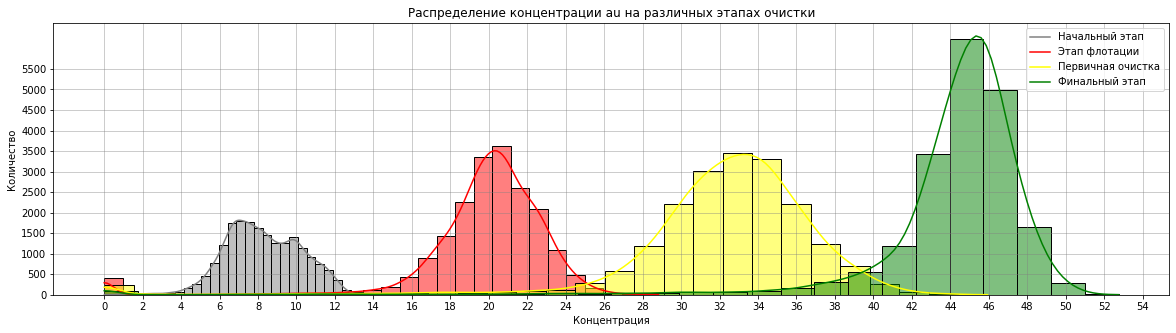

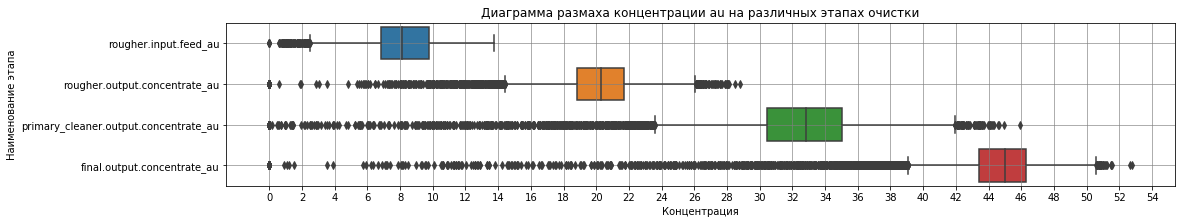

In [ ]:
metall_concentration(metall='au', pltx=np.arange(0, 56, 2), plty=np.arange(0, 6000, 500))

Как мы видим, по мере прохождения исходного материала последовательно по стадиям технологического процесса, доля золота в концентрате возрастает

Выведем на экран концентрацию Серебра на различных этапах очистки:

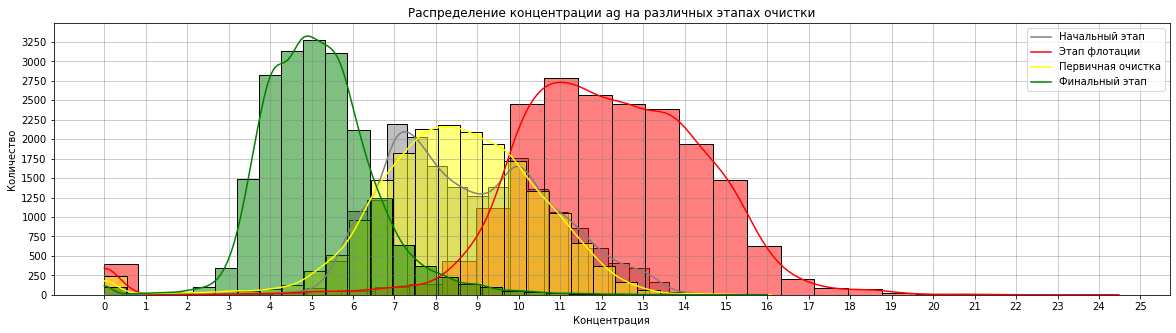

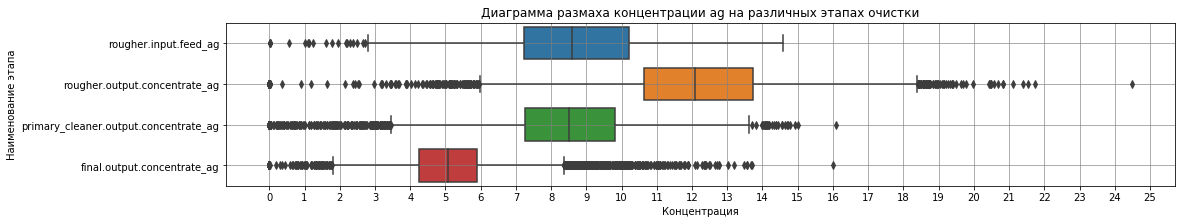

In [ ]:
metall_concentration(metall='ag', pltx=np.arange(0, 26, 1), plty=np.arange(0, 3500, 250))

На каждом этапе распределение становится меньше, а конценрация серебра снижается, но при этом при флотации концентрация повысилась, а дальше спуск.

Выведем на экран концентрацию Свинца на различных этапах очистки:

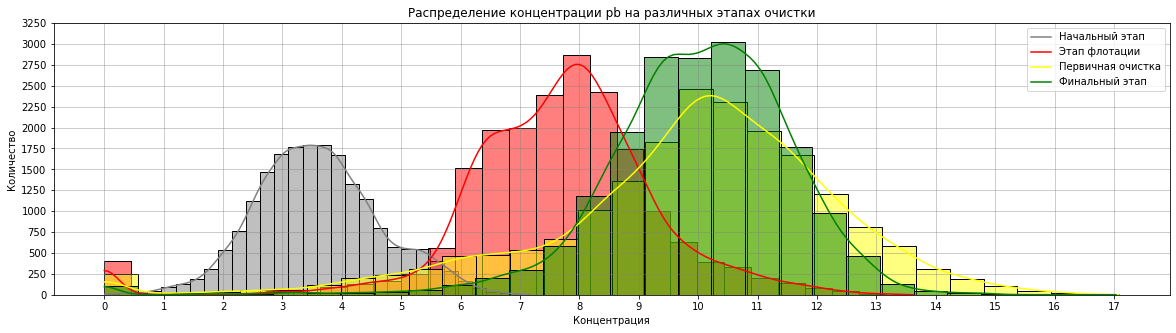

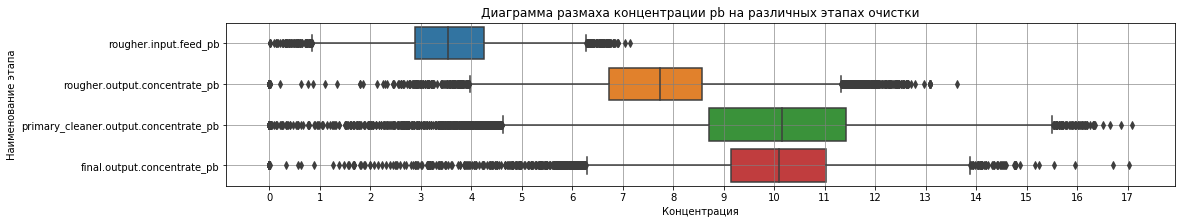

In [ ]:
metall_concentration(metall='pb', pltx=np.arange(0, 18, 1), plty=np.arange(0, 3500, 250))

С начального до первичной очистки этапов концетрация свинца немного повышается, но на финальном этапе снижается.

### Распределения размеров гранул сырья
Сравним распределения размеров гранул сырья на обучающей и тестовой выборках


Построим графики распределения:

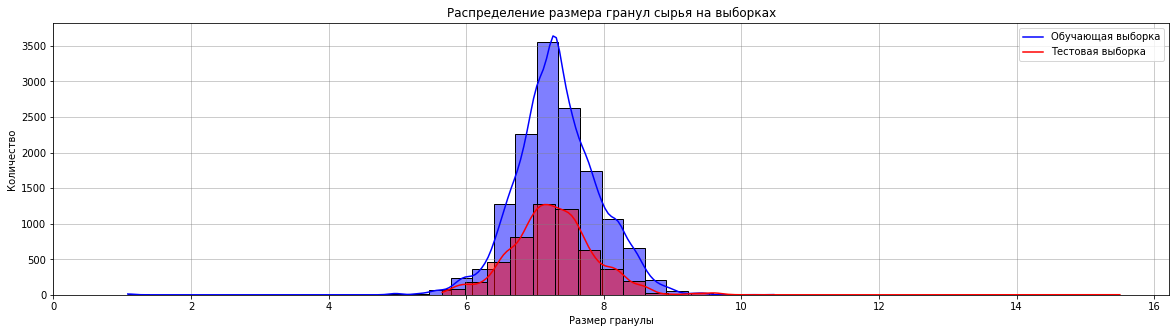

In [ ]:
plt.figure(figsize=(20, 5))
sns.histplot(data=df_train, x='primary_cleaner.input.feed_size', kde=True, bins=30, color='blue')
sns.histplot(data=df_test, x='primary_cleaner.input.feed_size', kde=True, bins=30, color='red')
plt.title(f'Распределение размера гранул сырья на выборках')
plt.ylabel('Количество')
plt.xlabel('Размер гранулы')
plt.grid(color='grey', axis='both', alpha=0.5)
plt.xticks(np.arange(0, 18, 2))
plt.yticks(np.arange(0, 4000, 500))
plt.legend(['Обучающая выборка', 'Тестовая выборка'])
plt.show()

Выведем статистические показатели размера гранул сырья:

In [ ]:
df_train['primary_cleaner.input.feed_size'].describe()

count    14149.000000
mean         7.322310
std          0.614062
min          1.080000
25%          6.960000
50%          7.290000
75%          7.700000
max         10.470000
Name: primary_cleaner.input.feed_size, dtype: float64

In [ ]:
df_test['primary_cleaner.input.feed_size'].describe()

count    5290.000000
mean        7.266339
std         0.610219
min         5.650000
25%         6.890000
50%         7.250000
75%         7.600000
max        15.500000
Name: primary_cleaner.input.feed_size, dtype: float64

Выведем диаграмму размаха:

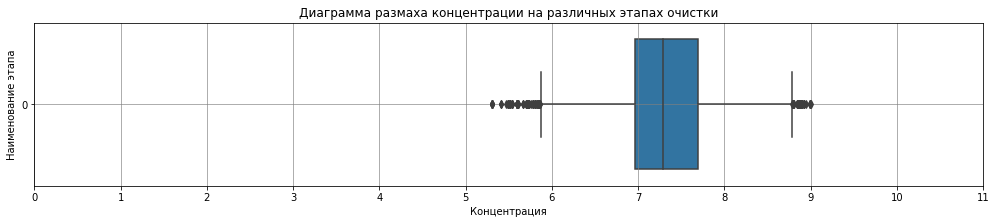

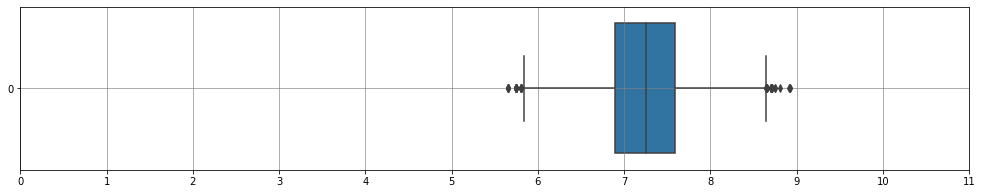

In [ ]:
plt.rcParams['figure.figsize']=(17, 3)
sns.boxplot(data=df_train['primary_cleaner.input.feed_size'][(df_train['primary_cleaner.input.feed_size'] > 5) & (df_train['primary_cleaner.input.feed_size'] <9)], orient="h" )
plt.title(f'Диаграмма размаха концентрации на различных этапах очистки')
plt.ylabel('Наименование этапа')
plt.xlabel('Концентрация')
plt.grid(color='grey', axis='both', alpha=.8)
plt.xticks(np.arange(0, 12, 1))
plt.show()

plt.rcParams['figure.figsize']=(17, 3)
sns.boxplot( data=df_test['primary_cleaner.input.feed_size'][(df_test['primary_cleaner.input.feed_size'] > 5) & (df_test['primary_cleaner.input.feed_size'] <9)], orient="h" )
plt.grid(color='grey', axis='both', alpha=.8)
plt.xticks(np.arange(0, 12, 1))
plt.show()

Размеры гранул в обучающей и тестовой выборках имеются очень сходижие распределения, а также близкие средние значения.

### Суммарная концентрация всех веществ
Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

Подсчитаем суммарную концентрацию:

In [ ]:
rougher_input_sum = df_full['rougher.input.feed_au'] + df_full['rougher.input.feed_ag'] + df_full['rougher.input.feed_pb'] + df_full['rougher.input.feed_sol']
rougher_output_sum = df_full['rougher.output.concentrate_au'] + df_full['rougher.output.concentrate_ag'] + df_full['rougher.output.concentrate_pb'] + df_full['rougher.output.concentrate_sol']
primary_cleaner_sum = df_full['primary_cleaner.output.concentrate_au'] + df_full['primary_cleaner.output.concentrate_ag'] + df_full['primary_cleaner.output.concentrate_pb'] + df_full['primary_cleaner.output.concentrate_sol']
final_output_sum = df_full['final.output.concentrate_au'] + df_full['final.output.concentrate_ag'] + df_full['final.output.concentrate_pb'] + df_full['final.output.concentrate_sol']

Построим графики распределения суммарной концентрации на разных стадиях:

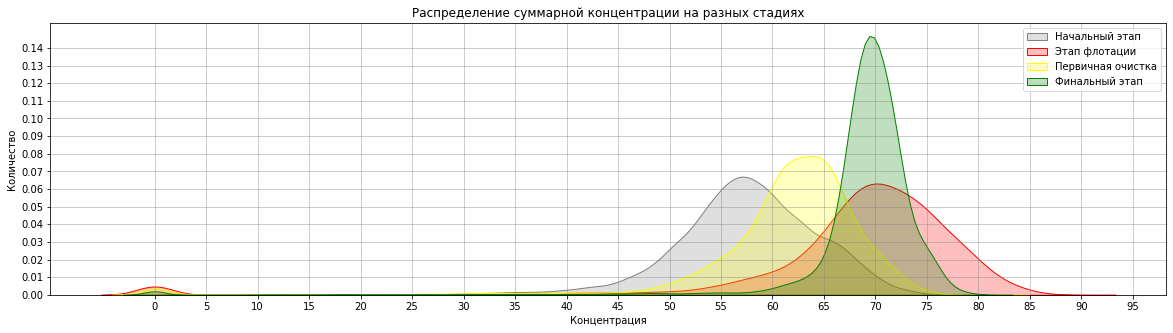

In [ ]:
plt.figure(figsize=(20, 5))
sns.kdeplot(rougher_input_sum, fill=True, color='grey')
sns.kdeplot(rougher_output_sum, fill=True, color='red')
sns.kdeplot(primary_cleaner_sum, fill=True, color='yellow')
sns.kdeplot(final_output_sum, fill=True, color='green')
plt.title('Распределение суммарной концентрации на разных стадиях')
plt.ylabel('Количество')
plt.xlabel('Концентрация')
plt.grid(color='grey', axis='both', alpha=0.5)
plt.xticks(np.arange(0, 100, 5))
plt.yticks(np.arange(0, 0.15, 0.01))
plt.legend(['Начальный этап', 'Этап флотации', 'Первичная очистка', 'Финальный этап'])

plt.show()

Удалим нулевы значения, т.к. их не должно быть, и скорее всего это какие-то неточности в данных:

In [ ]:
def drop_zeros(df):
    df_done = df.drop(rougher_input_sum[rougher_input_sum == 0].index, errors='ignore')
    df_done = df.drop(rougher_output_sum[rougher_output_sum == 0].index, errors='ignore')
    df_done = df.drop(primary_cleaner_sum[primary_cleaner_sum == 0].index, errors='ignore')
    df_done = df.drop(final_output_sum[final_output_sum == 0].index, errors='ignore')
    return df_done

In [ ]:
df_train_done = drop_zeros(df_train)

Выведем процент удаленных данных:

In [ ]:
(1 - len(df_train_done) / len(df_train)) * 100

0.40992296275355056

In [ ]:
df_test_done = drop_zeros(df_test)

Выведем процент удаленных данных:

In [ ]:
(1 - len(df_test_done) / len(df_test)) * 100

0.7561436672967825

Данные проанализированы и обработаны, приступим к построению моделей

## Модель

### Функция sMAPE
Напишим функцию для вычисления sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»), а также итоговой sMAPE.

In [ ]:
def sMAPE(target, predictions):
    sMAPE = (1 / len(target)) * (abs(target - predictions) / ((abs(target) + abs(predictions)) / 2)).sum() * 100
    return sMAPE

In [ ]:
def total_smape(smape_rougher, smape_final):
    final_result = 0.25 * smape_rougher + 0.75 * smape_final
    return final_result

### Обучение и проверка моделей

Обучим несколько разных моделей на получившейся обучающей выборке, посчитаем получившийся sMAPE и проверим их на тестовой выборке.

Для обучения моделей воспользуемся кросс валидацией.

Ещё нам надо добавить к обучающей и тестовой выборкам целевые признаки. Это колонки "rougher.output.recovery" и "final.output.recovery".   
Создадим под каждый целевой признак свои обучающие и тестовые выборки, и таргеты:

Создадим выборки под черновой целевой признак:

In [ ]:
rougher_columns = ['rougher.input.feed_ag', 'rougher.input.feed_pb',
    'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.feed_sol',
    'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 
    'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
    'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level',
    'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
    'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level',
    'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level']

train_rougher = df_train_done[rougher_columns]
target_train_rougher = df_full['rougher.output.recovery'][train_rougher.index]
test_rougher = df_test_done[rougher_columns]
target_test_rougher = df_full['rougher.output.recovery'][test_rougher.index]

print(train_rougher.shape, target_train_rougher.shape, test_rougher.shape, target_test_rougher.shape, sep=' | ')

(14091, 22) | (14091,) | (5250, 22) | (5250,)


Создадим выборки под финальный целевой признак:

In [ ]:
train_final = df_train_done.drop(rougher_columns, axis=1)
target_train_final = df_full['final.output.recovery'][train_final.index]
test_final = df_test_done.drop(rougher_columns, axis=1)
target_test_final = df_full['final.output.recovery'][test_final.index]

print(train_final.shape, target_train_final.shape, test_final.shape, target_test_final.shape, sep=' | ')

(14091, 30) | (14091,) | (5250, 30) | (5250,)


Выборки созданы, теперь можно заняться моделями.

Определим функцию для обучения, выбора и оценки лучшей модели:

In [ ]:
def fit_and_check(model, params, df_train, df_target):
    my_scorer = make_scorer(sMAPE, greater_is_better=False)
    clf = GridSearchCV(model, params, scoring=my_scorer, cv=5)
    clf.fit(df_train, df_target)
    
    return clf.best_estimator_, clf.best_score_

Выберем модели: Решающее дерево, Случайный лес и Линейную регрессию.  

Создадим функцию для определения гиперпараметров по выбранным моделям, сохраненим лучшие модели и подчитаем время подбора каждой модели:

In [ ]:
def models_score(train, target):
    
    print('Время обучения и подбора лучшей модели Решающее дерево:')
    model_tree = DecisionTreeRegressor()
    params = {'max_depth': range(1, 20), 'random_state': [555]}
    best_tree_model, best_tree_model_result = %time fit_and_check(model_tree, params, train, target)
    print('__________________________________________________________')
    
    print('Время обучения и подбора лучшей модели Случайный лес:')    
    model_forest = RandomForestRegressor()
    params = {'n_estimators': range(50, 100, 10), 'max_depth': range(1, 5), 'random_state': [555]}
    best_forest_model, best_forest_model_result = %time fit_and_check(model_forest, params, train, target)
    print('__________________________________________________________')
    
    print('Время обучения и подбора лучшей модели Линейная регрессия:')    
    model_linear = LinearRegression()
    params = {}
    best_lin_model, best_lin_model_result = %time fit_and_check(model_linear, params, train, target)
    
    results = [best_tree_model_result, best_forest_model_result, best_lin_model_result]
    
    return best_tree_model, best_forest_model, best_lin_model, results

Проведём исследования на обучающих выборках по черновому процессу:

In [ ]:
best_tree_model_1, best_forest_model_1, best_lin_model_1, results_train_rougher = models_score(
    train_rougher, target_train_rougher)

Время обучения и подбора лучшей модели Решающее дерево:
CPU times: user 22.7 s, sys: 0 ns, total: 22.7 s
Wall time: 22.7 s
__________________________________________________________
Время обучения и подбора лучшей модели Случайный лес:
CPU times: user 5min 20s, sys: 247 ms, total: 5min 20s
Wall time: 5min 20s
__________________________________________________________
Время обучения и подбора лучшей модели Линейная регрессия:
CPU times: user 456 ms, sys: 525 ms, total: 981 ms
Wall time: 959 ms


Проведём исследования на обучающих выборках по финальной очистке:

In [ ]:
best_tree_model_2, best_forest_model_2, best_lin_model_2, results_train_final = models_score(
    train_final, target_train_final)

Время обучения и подбора лучшей модели Решающее дерево:
CPU times: user 29.1 s, sys: 83.9 ms, total: 29.2 s
Wall time: 29.3 s
__________________________________________________________
Время обучения и подбора лучшей модели Случайный лес:
CPU times: user 6min 51s, sys: 370 ms, total: 6min 51s
Wall time: 6min 51s
__________________________________________________________
Время обучения и подбора лучшей модели Линейная регрессия:
CPU times: user 520 ms, sys: 589 ms, total: 1.11 s
Wall time: 1.08 s


Воспользуемся функцией по вычислению итоговой sMAPE и посмотрим на результаты:

In [ ]:
res_train = {'sMAPE rougher output': results_train_rougher,
       'sMAPE final output': results_train_final,
       'sMAPE total': [total_smape(results_train_rougher[0], results_train_final[0]),
                      total_smape(results_train_rougher[1], results_train_final[1]),
                      total_smape(results_train_rougher[2], results_train_final[2])]}
train_results = pd.DataFrame(data=res_train, index=('Решающее дерево', 'Случайный лес', 'Линейная регрессия'))
train_results

,sMAPE rougher output,sMAPE final output,sMAPE total
Решающее дерево,-12.111020,-10.193962,-10.673226
Случайный лес,-11.500535,-10.043035,-10.407410
Линейная регрессия,-12.427463,-9.811392,-10.465410


Показатель sMAPE очень близок для всех моделей, но с учетом времени обучения и показателя sMAPE лучше всего себя показала модель Линейная регрессия.

### Тест лучших моделей

Теперь проверим лучшие модели на тестовых выборках.

Создадим функцию по тестированию и выводу результатов, для сравнения наших моделей добавим модель Дамми:

In [ ]:
def final_test(model_tree, model_forest, model_linear, df_test, df_target, df_test_dummy, df_target_dummy):
    
    print('Время предсказания решающего дерева:') 
    predictions_tree = %time model_tree.predict(df_test)
    score_tree = sMAPE(df_target, predictions_tree)
    print('--------------------------------------------')
    
    print('Время предсказания случайного леса:')
    predictions_forest = %time model_forest.predict(df_test)
    score_forest = sMAPE(df_target, predictions_forest)
    print('--------------------------------------------')
    
    print('Время предсказания линейной регрессии:')
    predictions_linear = %time model_linear.predict(df_test)
    score_linear = sMAPE(df_target, predictions_linear)
    
    dummy = DummyRegressor(strategy='median').fit(df_test_dummy, df_target_dummy)
    predictions_dummy = dummy.predict(df_test)
    score_dummy = sMAPE(df_target, predictions_dummy)
    
    results = [score_tree, score_forest, score_linear, score_dummy]
    
    return results

Проведём исследования:

In [ ]:
results_test_rougher = final_test(best_tree_model_1, best_forest_model_1, best_lin_model_1,
                          test_rougher, target_test_rougher, train_rougher, target_train_rougher)

Время предсказания решающего дерева:
CPU times: user 2.1 ms, sys: 12 µs, total: 2.11 ms
Wall time: 1.55 ms
--------------------------------------------
Время предсказания случайного леса:
CPU times: user 13.4 ms, sys: 0 ns, total: 13.4 ms
Wall time: 12.9 ms
--------------------------------------------
Время предсказания линейной регрессии:
CPU times: user 2.38 ms, sys: 0 ns, total: 2.38 ms
Wall time: 1.23 ms


In [ ]:
results_test_final = final_test(best_tree_model_2, best_forest_model_2, best_lin_model_2,
                          test_final, target_test_final, train_final, target_train_final)

Время предсказания решающего дерева:
CPU times: user 15 ms, sys: 16 ms, total: 31 ms
Wall time: 89.9 ms
--------------------------------------------
Время предсказания случайного леса:
CPU times: user 7.96 ms, sys: 0 ns, total: 7.96 ms
Wall time: 7.34 ms
--------------------------------------------
Время предсказания линейной регрессии:
CPU times: user 25.5 ms, sys: 24 ms, total: 49.5 ms
Wall time: 9.29 ms


Посмотрим на результаты:

In [ ]:
res_test = {'test sMAPE rougher output': results_test_rougher,
       'test sMAPE final output': results_test_final,
       'test sMAPE total': [total_smape(results_test_rougher[0], results_test_final[0]),
                      total_smape(results_test_rougher[1], results_test_final[1]),
                      total_smape(results_test_rougher[2], results_test_final[2]),
                        total_smape(results_test_rougher[3], results_test_final[3])]}
train_results = pd.DataFrame(data=res_test, index=(
    'Решающее дерево', 'Случайный лес', 'Линейная регрессия', 'Дамми'))
train_results

,test sMAPE rougher output,test sMAPE final output,test sMAPE total
Решающее дерево,11.138162,7.927526,8.730185
Случайный лес,9.559088,7.793134,8.234622
Линейная регрессия,9.223832,8.758820,8.875073
Дамми,8.484803,8.301838,8.347579


Итоговый результаты на тесте у всех моделей очень близки.  
При этом резльутаты дамми модели не сильно отсаются, а на черновом этапе даже превосходят наши модели.  

## Общий вывод

К сожалению наши модели выдют предсказания близкие к Дамми модели. Поэтому использовать их для оценки не целесообразно.  
Данные результаты связан со сложностью анализруемых данных, понимаем технологического процесса, сложностью интерпретации признаков и их корректного анализа.  
Требуется дальнеший анализ и тесная работа с заказчиком, в т.м. числе технологом-химиком в металлургии.